In [1]:
import pandas as pd
import numpy as np
import keras
np.random.seed(2)

Using TensorFlow backend.


In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
from sklearn.preprocessing import StandardScaler
data['norm_amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop('Amount',axis=1)

In [5]:
data = data.drop('Time',axis=1)

In [17]:
X = data.iloc[:,data.columns!='Class'].values
y = data.iloc[:,data.columns =='Class'].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

## Deep neural network

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [21]:
model = Sequential([
    Dense(units = 16,input_dim = 29 ,activation = 'relu'),
    Dense(units = 24,activation = 'relu'),
    Dropout(0.5),
    Dense(20,activation = 'relu'),
    Dense(24,activation = 'relu'),
    Dense(1,activation = 'sigmoid'),
])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

In [23]:
#Training the model
model.compile(optimizer='adam', loss='binary_crossentropy',metrics = ['accuracy'])
model.fit(X_train,y_train,batch_size = 15,epochs = 5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/5
199364/199364 [==============================] - 55s 275us/step - loss: 0.0095 - accuracy: 0.9979
Epoch 2/5
199364/199364 [==============================] - 36s 180us/step - loss: 0.0038 - accuracy: 0.9994
Epoch 3/5
199364/199364 [==============================] - 47s 236us/step - loss: 0.0035 - accuracy: 0.9994
Epoch 4/5
199364/199364 [==============================] - 60s 302us/step - loss: 0.0031 - accuracy: 0.9994
Epoch 5/5
199364/199364 [==============================] - 60s 300us/step - loss: 0.0032 - accuracy: 0.9994


In [25]:
score = model.evaluate(X_test,y_test)
print(score)

85443/85443 [==============================] - 3s 39us/step
[0.0034101878631725706, 0.9993914365768433]


In [38]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [36]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred.round())

Confusion matrix, without normalization
[[85276    20]
 [   32   115]]


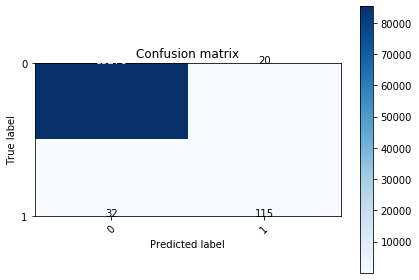

<Figure size 432x288 with 0 Axes>

In [41]:
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()